# **Name: Kanaganandini Kanagaraj**
# **Reg_no: BLENU4AIE21064**
# **DATE: 26/02/24**

In [7]:
pip install librosa

In [11]:
!pip install pydub



In [1]:
import nltk


In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

import IPython.display as ipd
import pandas as pd
from glob import glob
import numpy as np

In [14]:
from pydub import AudioSegment

def convert_m4a_to_wav(m4a_file, wav_file):
    sound = AudioSegment.from_file(m4a_file)
    sound.export(wav_file, format="wav")

# Replace "input.m4a" with the path to your M4A file
# Replace "output.wav" with the desired path for the output WAV file
convert_m4a_to_wav("/content/Recording (8).m4a", "output.wav")


In [15]:
af = glob("/content/output.wav")
ipd.Audio(af[0])

22050


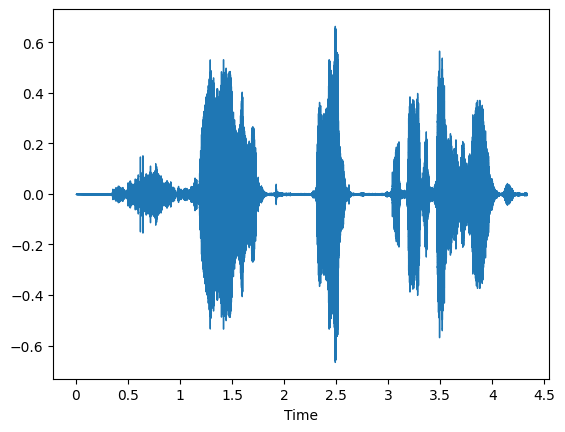

In [18]:
#file is the input audio file
file = '/content/output.wav'


y, sr = librosa.load(file)
#displaying the waveform of audio
librosa.display.waveshow(y)
print(sr)

In [59]:
print(y)
len(y)

[-1.2445524e-09  4.8178390e-09 -7.7416793e-09 ...  8.1966893e-05
  9.3634852e-05  0.0000000e+00]


95492

## A1.Use numpy.fft.fft()to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.

[ 0.23362437-1.28785871e-14j  0.30937713-6.66370209e-01j
 -0.27679177+1.19848868e-01j ... -0.08110828-2.33285687e-01j
 -0.27679177-1.19848868e-01j  0.30937713+6.66370209e-01j]


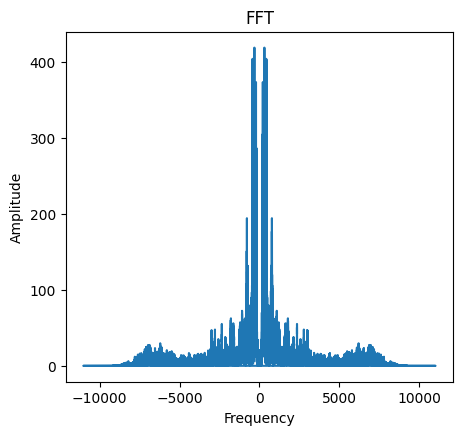

In [58]:
fft = np.fft.fft(y)
print(fft)
fftfre = np.fft.fftfreq(len(y),1/sr)
plt.figure(figsize=(5, 10))
plt.subplot(2, 1, 1)
plt.plot(fftfre, np.abs(fft))
plt.title('FFT')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## A2. Use numpy.fft.ifft()to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal.

[ 2.44653343e-06+4.40457133e-20j  3.23982249e-06+6.97828310e-06j
 -2.89858592e-06-1.25506711e-06j ... -8.49372493e-07+2.44298671e-06j
 -2.89858592e-06+1.25506711e-06j  3.23982249e-06-6.97828310e-06j]


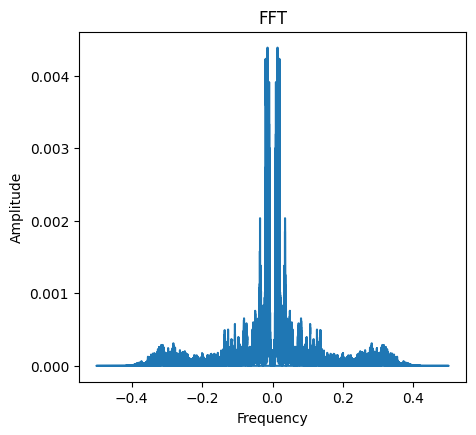

In [32]:
fft = np.fft.ifft(y)
print(fft)
fftfre = np.fft.fftfreq(len(y))
plt.figure(figsize=(5, 10))
plt.subplot(2, 1, 1)
plt.plot(fftfre, np.abs(fft))
plt.title('FFT')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


## A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal.

[0.00591677+0.j         0.02111773-0.01199425j 0.00261463+0.02268985j ...
 0.05562424+0.06705399j 0.00261463-0.02268985j 0.02111773+0.01199425j]


Text(0.5, 1.0, 'FFT of Word')

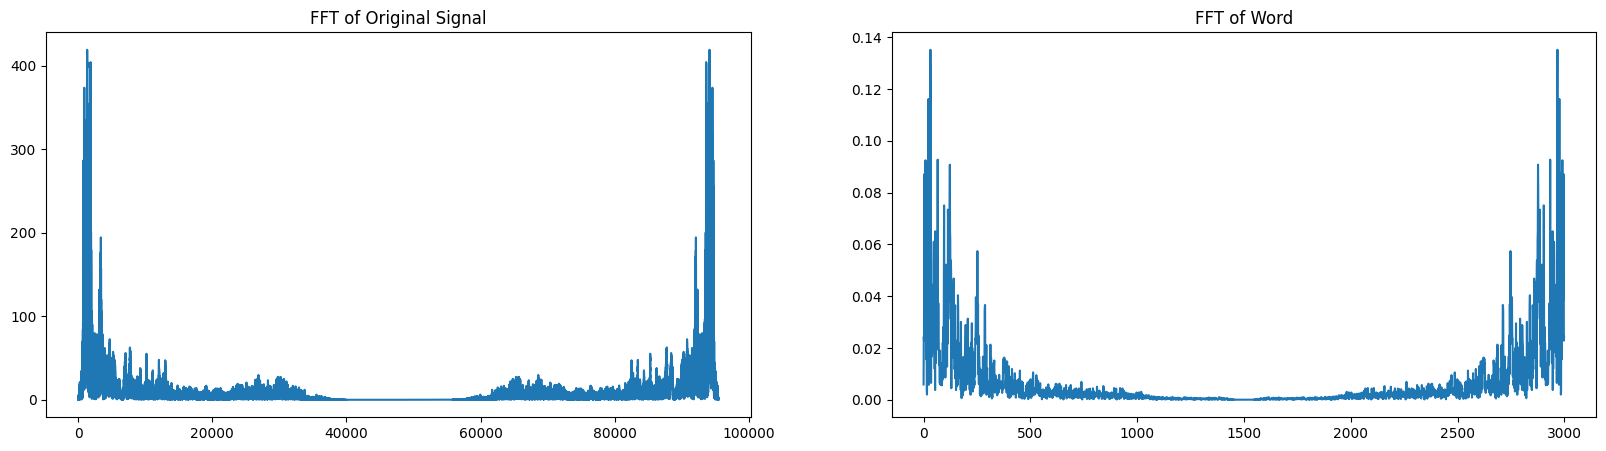

In [61]:
from IPython.display import Audio

Audio('/content/output.wav')
len(y)
Audio(y[1000:4000],rate = sr)
word = y[1000:4000]
word_fft = np.fft.fft(word)
print(word_fft)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(np.abs(fft))
plt.title('FFT of Original Signal')

plt.subplot(1,2,2)
plt.plot(np.abs(word_fft))
plt.title('FFT of Word')

## A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.

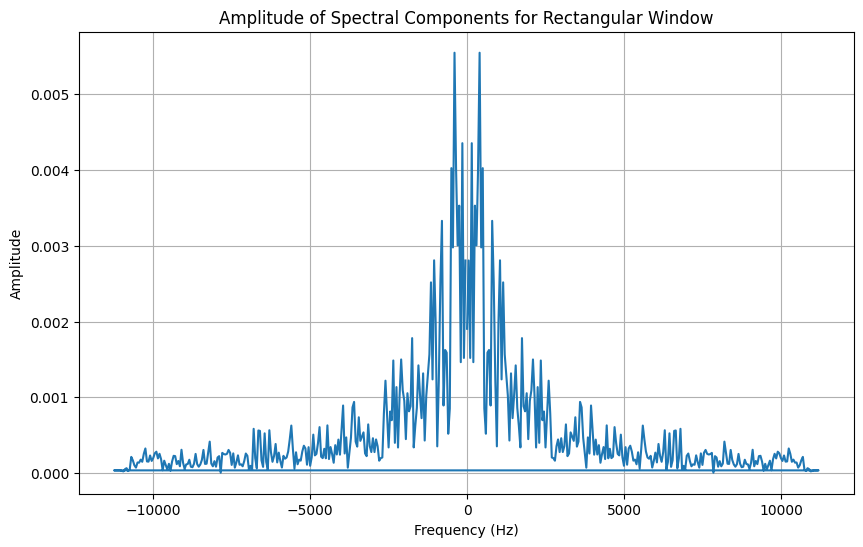

In [62]:
# Define parameters
wl = 20
wls = int(wl * 22.5)  # Assuming 22.5 kHz sample rate
window = y[:wls]

# Perform FFT
fft_result_window = np.fft.fft(window)

# Calculate frequencies
frequencies_window = np.fft.fftfreq(wls, d=1/22500)

# Plot amplitude
plt.figure(figsize=(10, 6))
plt.plot(frequencies_window, np.abs(fft_result_window))
plt.title('Amplitude of Spectral Components for Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


## A5. Break your speech signal into window lengths of 20 mSec intervals.Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix.You may use librosa.stft()or scipy.signal.stft()as well to achieve this.

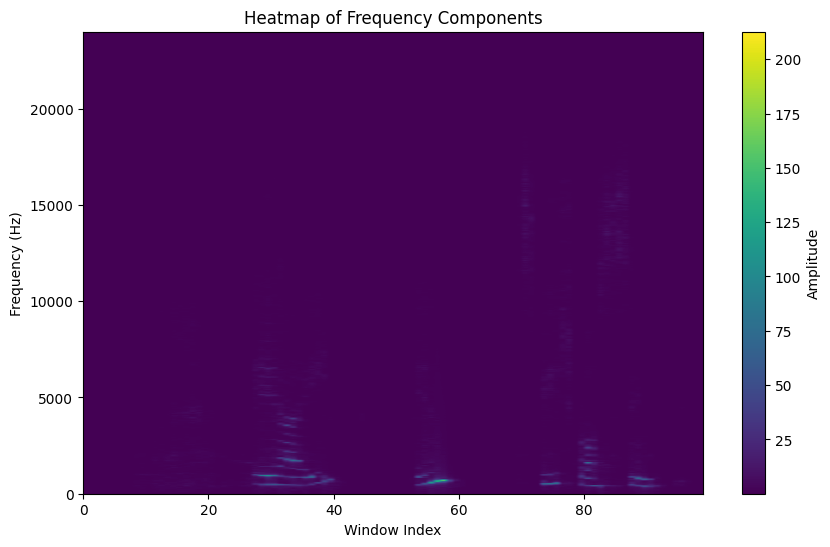

In [71]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


wl = 20  # window
wls = int(wl / 1000 * sample_rate)  # window lenth sample


num_windows = len(y) // wls

fm = np.zeros((wls // 2 + 1, num_windows))  # frequency matrix

# Iterate over windows and compute FFT
for i in range(num_windows):
    si = i * wls
    ei = (i + 1) * wls
    window = y[si:ei]
    fft_result = np.fft.rfft(window)
    fm[:, i] = np.abs(fft_result)

# Plot heatmap
plt.figure(figsize=(10, 6))
plt.imshow(fm, aspect='auto', cmap='viridis', origin='lower', extent=[0, num_windows, 0, sample_rate / 2])
plt.colorbar(label='Amplitude')
plt.title('Heatmap of Frequency Components')
plt.xlabel('Window Index')
plt.ylabel('Frequency (Hz)')
plt.show()


## A6. Use scipy.signal.spectrogram()to plot the spectrogram of the speech signal at the same duration. Compare the plots.

<ipython-input-70-cd0b93b9a735>:8: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(ts, fs, np.log(ss), shading='gouraud')


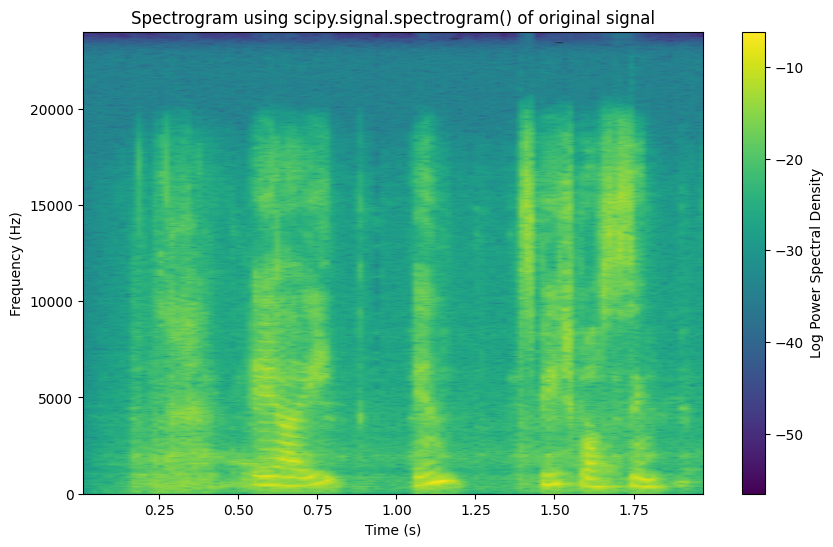

In [70]:
from scipy.signal import spectrogram


fs, ts, ss = spectrogram(y, fs=sample_rate, nperseg=window_length_samples)


plt.figure(figsize=(10, 6))
plt.pcolormesh(ts, fs, np.log(ss), shading='gouraud')
plt.title('Spectrogram using scipy.signal.spectrogram() of original signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Log Power Spectral Density')
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1870: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


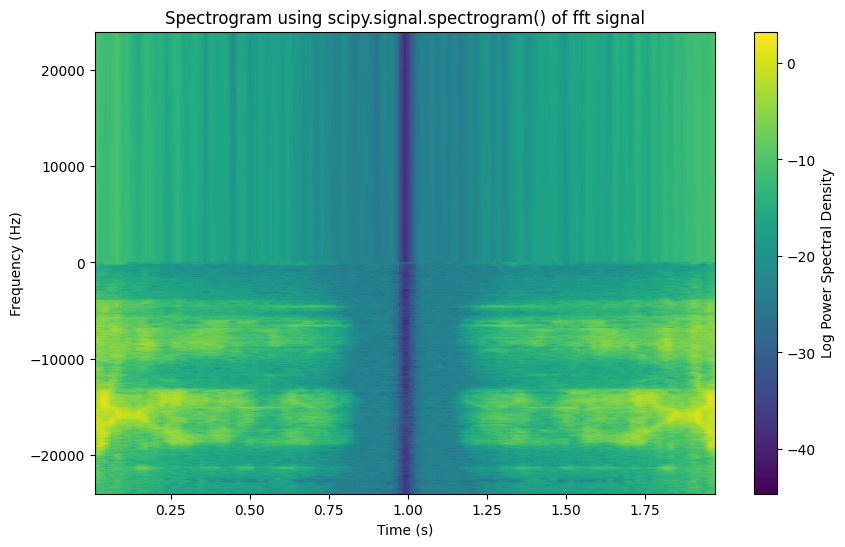

In [69]:

fs1, ts1, ss1 = spectrogram(fft, fs=sample_rate, nperseg=window_length_samples)
plt.figure(figsize=(10, 6))
plt.pcolormesh(ts1, fs1, np.log(ss1), shading='gouraud')
plt.title('Spectrogram using scipy.signal.spectrogram() of fft signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Log Power Spectral Density')
plt.show()
